In [2]:
import matplotlib.pyplot as plt

import satpy
from satpy.scene import Scene

In [3]:
f = "data/FY4B-_AGRI--_N_DISK_1050E_L1-_FDI-_MULT_NOM_20240502030000_20240502031459_4000M_V0001.HDF"
scn = Scene([f], reader="agri_fy4b_l1") #agri_l1
# scn.avaiable_dataset_names()
scn

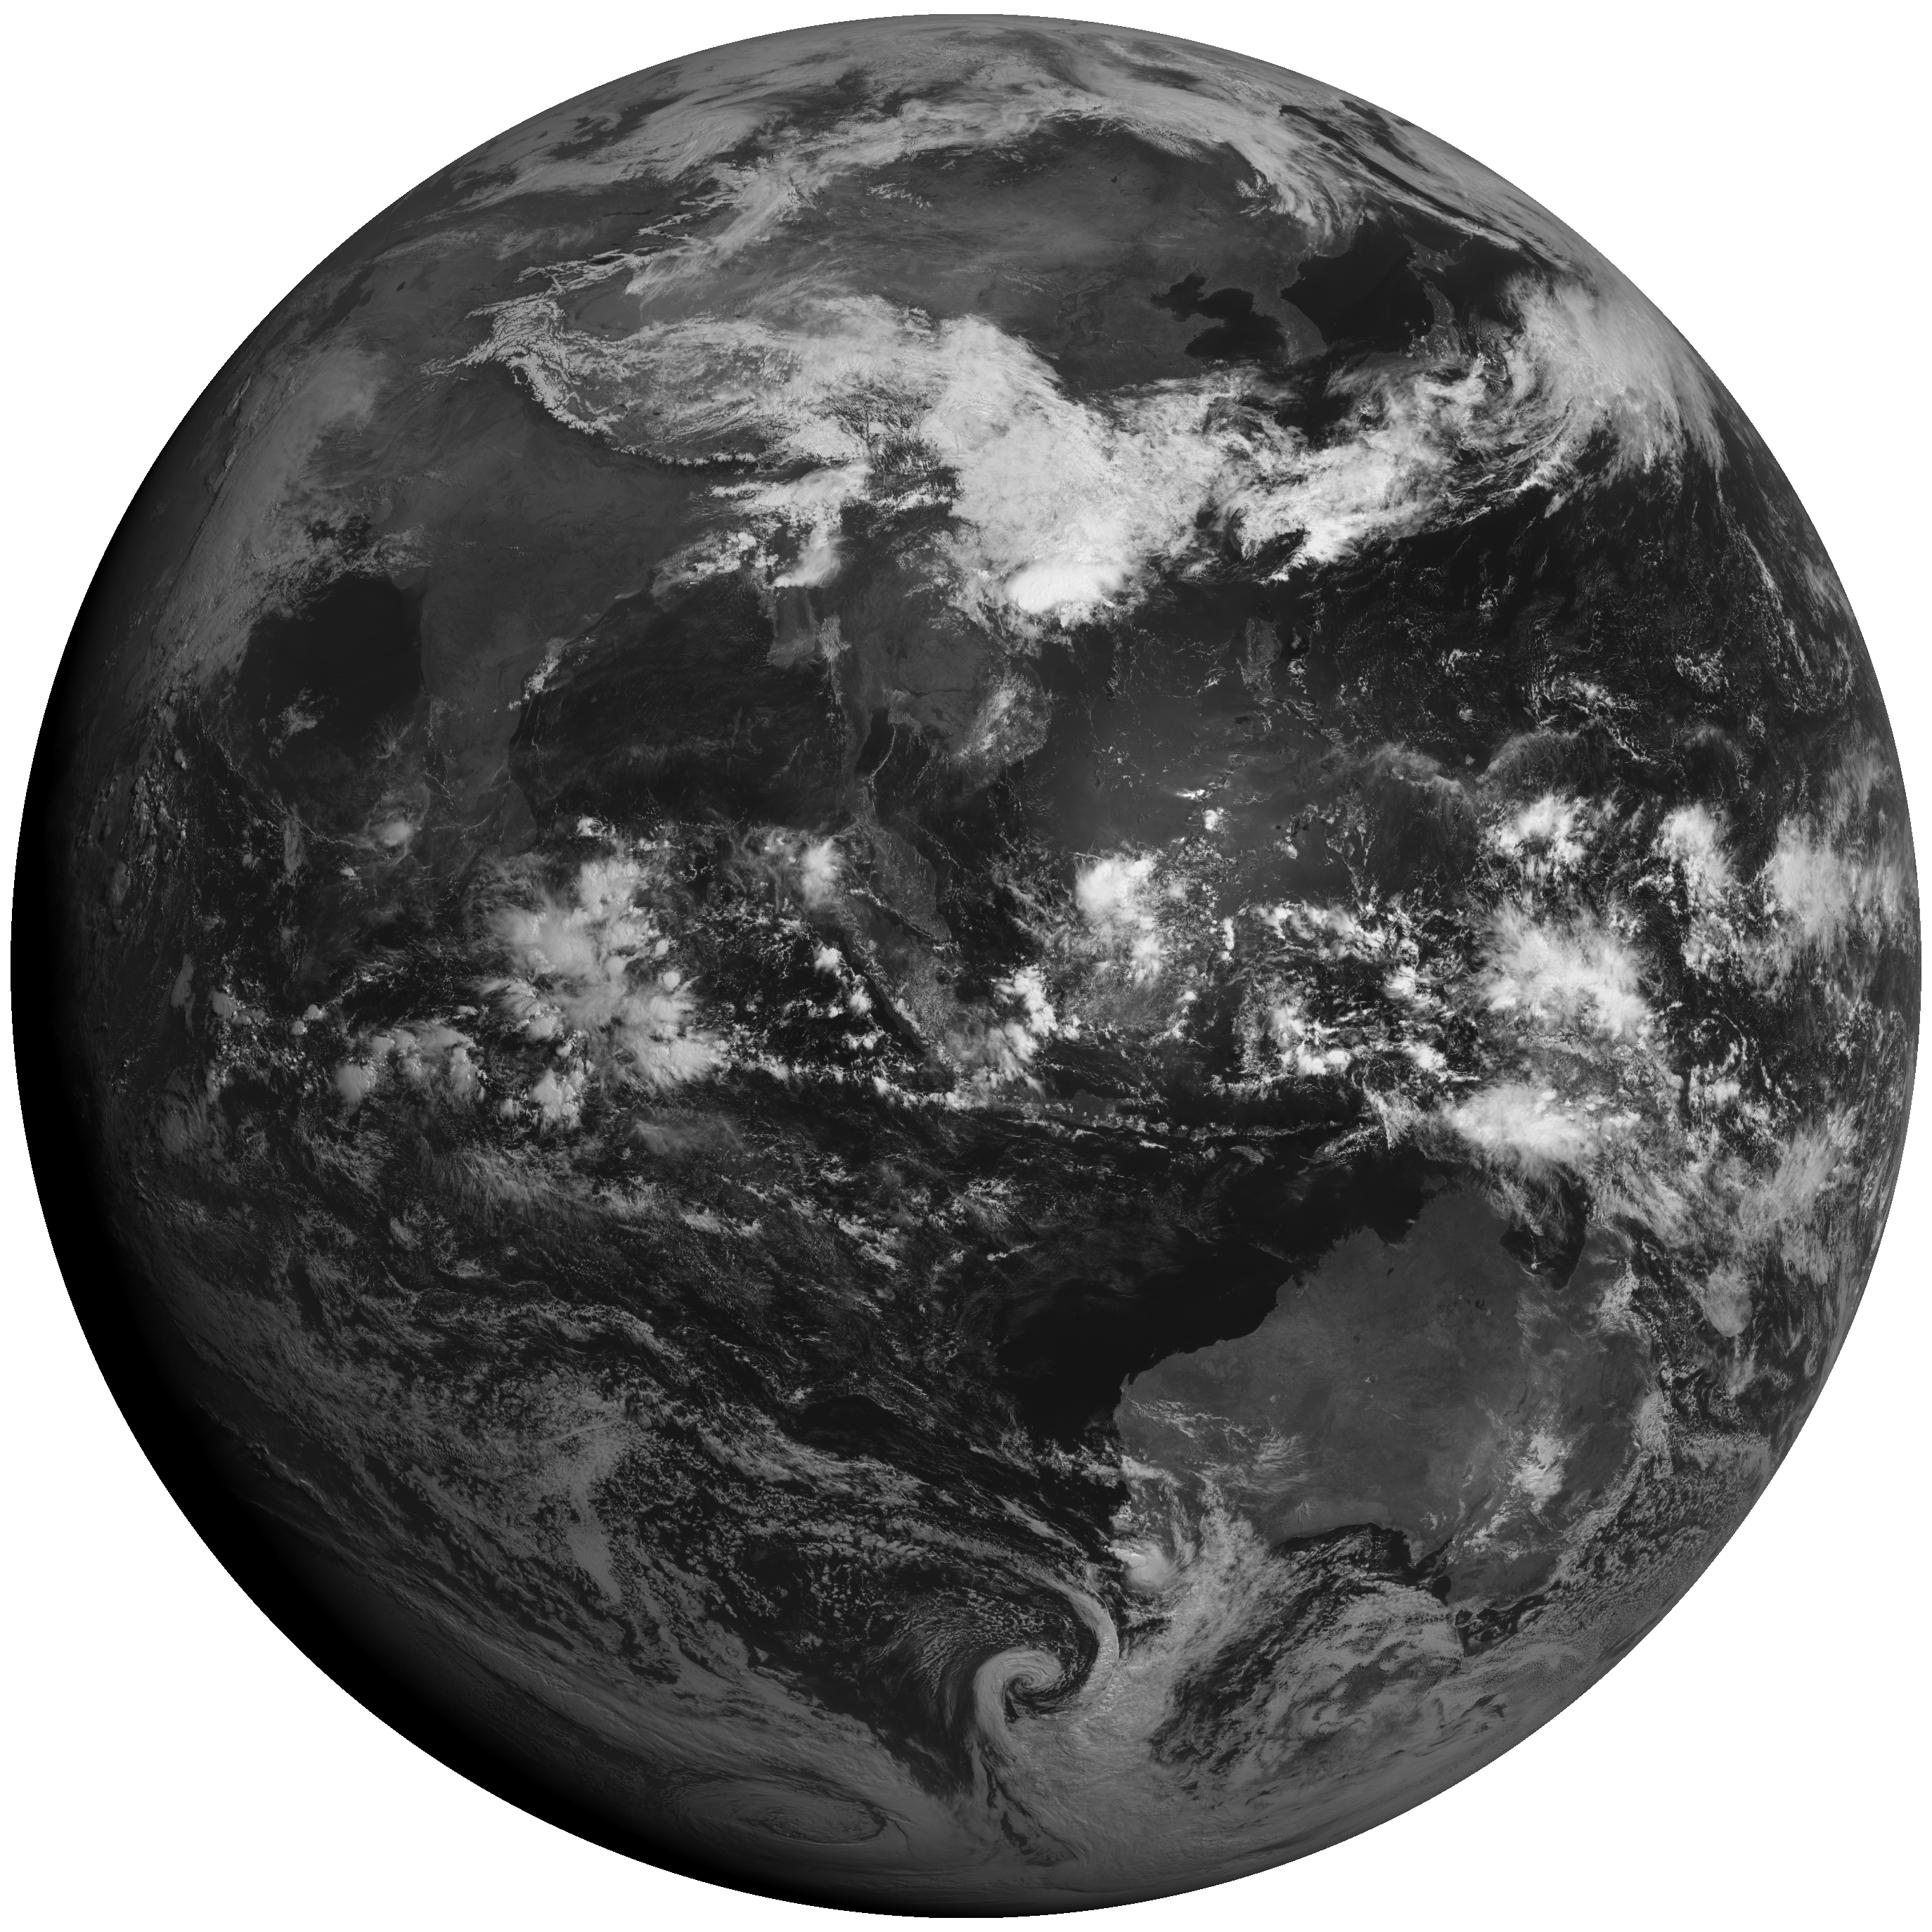

In [10]:
band = "C02"
scn.load([band])

scn.show(band)

In [11]:
scn.to_xarray()

<xarray.Dataset> Size: 483MB
Dimensions:     (y: 2748, x: 2748, bands: 3)
Coordinates:
  * y           (y) float64 22kB 5.494e+06 5.49e+06 ... -5.49e+06 -5.494e+06
  * x           (x) float64 22kB -5.494e+06 -5.49e+06 ... 5.49e+06 5.494e+06
    longitude   (y, x) float64 60MB dask.array<chunksize=(2748, 2748), meta=np.ndarray>
    latitude    (y, x) float64 60MB dask.array<chunksize=(2748, 2748), meta=np.ndarray>
  * bands       (bands) <U1 12B 'R' 'G' 'B'
Data variables:
    DISK_4000m  int32 4B 0
    C01         (y, x) float64 60MB dask.array<chunksize=(2748, 2748), meta=np.ndarray>
    C02         (y, x) float64 60MB dask.array<chunksize=(2748, 2748), meta=np.ndarray>
    C12         (y, x) float64 60MB dask.array<chunksize=(2748, 2748), meta=np.ndarray>
    true_color  (bands, y, x) float64 181MB dask.array<chunksize=(1, 2748, 2748), meta=np.ndarray>
Attributes:
    history:      Created by pytroll/satpy on 2024-05-03 07:52:53.865568
    Conventions:  CF-1.7

In [9]:
scn.available_composite_names()

Too many possible datasets to load for DataQuery(wavelength=3.9)
Too many possible datasets to load for DataQuery(wavelength=3.9)
Too many possible datasets to load for DataQuery(wavelength=3.9)
Too many possible datasets to load for DataQuery(wavelength=3.9)
Too many possible datasets to load for DataQuery(wavelength=3.9)
Too many possible datasets to load for DataQuery(wavelength=3.9)
Too many possible datasets to load for DataQuery(wavelength=3.9)


['24h_microphysics',
 'ash',
 'cimss_cloud_type',
 'cimss_cloud_type_raw',
 'cloud_phase',
 'cloud_phase_distinction',
 'cloud_phase_distinction_raw',
 'cloud_phase_raw',
 'color_infrared',
 'day_microphysics',
 'day_microphysics_agri',
 'day_microphysics_eum',
 'dust',
 'fire_temperature_awips',
 'fog',
 'green',
 'green_nocorr',
 'green_snow',
 'ir108_3d',
 'ir_cloud_day',
 'land_cloud',
 'land_cloud_fire',
 'natural_color',
 'natural_color_raw',
 'natural_enh',
 'overview',
 'overview_raw',
 'pseudored',
 'pseudored_nocorr',
 'snow',
 'snow_fog',
 'true_color',
 'true_color_nocorr']

In [8]:
band = "true_color"
scn.load([band])
scn.show(band)
scn.save_dataset(band, filename='FY4B_01.png')

c:\ProgramData\miniconda3\envs\satpy\Lib\site-packages\satpy\composites\__init__.py:1404: RuntimeWarning: Mean of empty slice
  data_mean = np.nanmean(av_data.reshape(new_shape), axis=(1, 3))


In [20]:
# 如果你已经添加区域到areas.yaml中，可直接调用:
# import os
# os.environ['PPP_CONFIG_DIR'] = 'c:/Users/kongdd/Desktop/FengYun.jl/config'
satpy.config.set(config_path=['./config'])

s_china = scn.resample('china_4km')
s_china.show(band)

# Save to TIFF
s_china.save_dataset(band, filename='output.tiff')
